In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from datetime import date

In [2]:
asset='AAPL'
inizio=date(2018,1,1)
fine=date.today()
data=yf.download(asset,inizio,fine)
df=pd.DataFrame(data)

[*********************100%***********************]  1 of 1 completed


In [3]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-02,170.160004,172.300003,169.259995,172.259995,167.199890,25555900
2018-01-03,172.529999,174.550003,171.960007,172.229996,167.170776,29517900
2018-01-04,172.539993,173.470001,172.080002,173.029999,167.947266,22434600
2018-01-05,173.440002,175.369995,173.050003,175.000000,169.859406,23660000
2018-01-08,174.350006,175.610001,173.929993,174.350006,169.228500,20567800


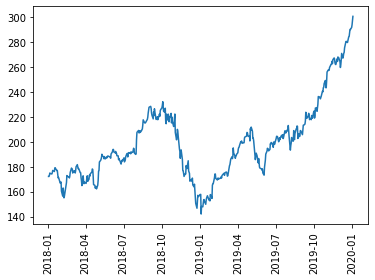

In [6]:
plt.xticks(rotation='vertical')
plt.plot(df['Close'])
plt.show()

In [9]:
from fredapi import Fred
fred = Fred(api_key='La_vostra_API-KEY')

WTI
1986-01-02    25.56
1986-01-03    26.00
1986-01-06    26.53
1986-01-07    25.85
1986-01-08    25.87
dtype: float64
BRENT
1987-05-20    18.63
1987-05-21    18.45
1987-05-22    18.55
1987-05-25    18.60
1987-05-26    18.63
dtype: float64


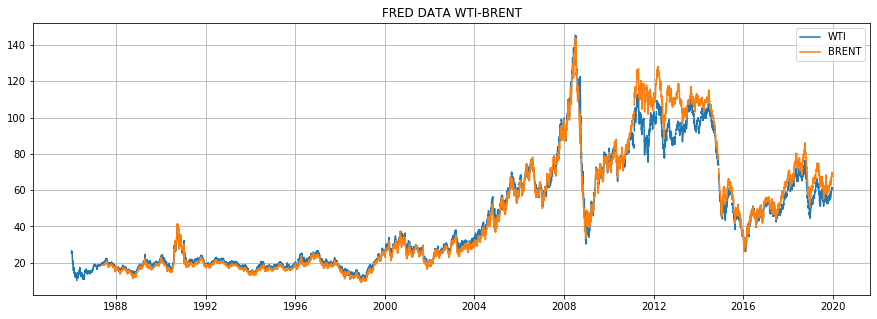

In [10]:
df = fred.get_series('DCOILWTICO')
print('WTI')
print(df.head())
df1 = fred.get_series('DCOILBRENTEU')
print('BRENT')
print(df1.head())
plt.figure(num=None, figsize=(15, 5))
plt.plot(df,label='WTI')
plt.plot(df1,label='BRENT')
plt.grid()
plt.legend( ['WTI', 'BRENT'])
plt.title('FRED DATA WTI-BRENT')
plt.show()

GOLD
1968-04-01    38.0
1968-04-02    37.6
1968-04-03    37.7
1968-04-04    36.7
1968-04-05    37.2
dtype: float64


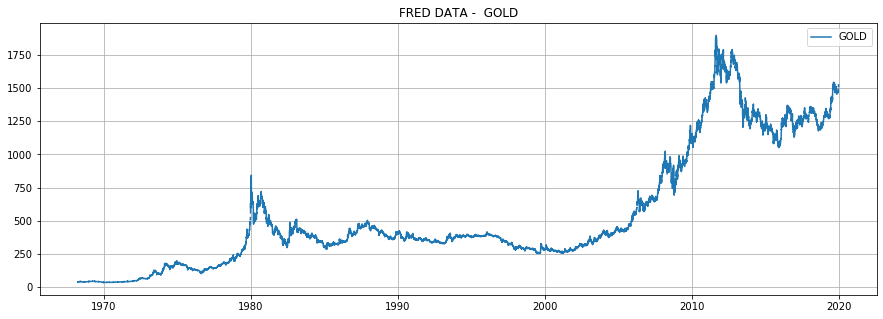

In [11]:
df = fred.get_series('GOLDAMGBD228NLBM')
print('GOLD')
print(df.head())
plt.figure(num=None, figsize=(15, 5))
plt.plot(df,label='GOLD')
plt.grid()
plt.legend( ['GOLD'])
plt.title('FRED DATA -  GOLD')
plt.show()

In [12]:
import quandl
quandl.ApiConfig.api_key = 'La_vostra_API-KEY'
df=quandl.get('LPPM/PALL')
df.tail()

,USD AM,EUR AM,GBP AM,USD PM,EUR PM,GBP PM
Date,,,,,,
2019-12-17,1990.0,1784.75,1509.86,1950.0,1748.88,1482.33
2019-12-18,1936.0,1738.66,1476.17,1936.0,1741.01,1480.12
2019-12-19,1926.0,1729.68,1470.79,1929.0,1736.27,1478.16
2019-12-20,1939.0,1743.71,1486.96,1930.0,1740.31,1478.93
2019-12-23,1881.0,1696.89,1444.70,1853.0,1672.38,1433.66


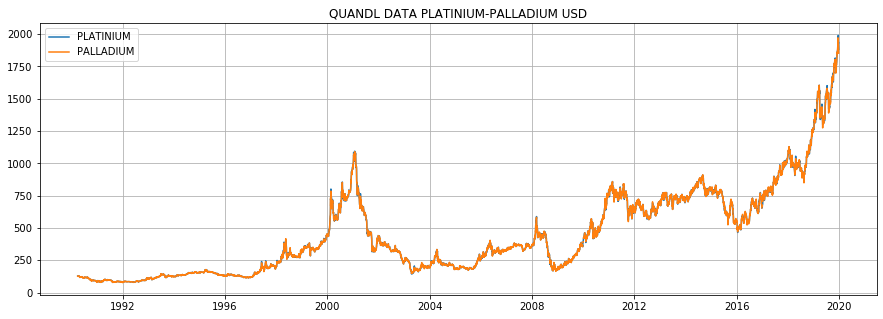

In [13]:
plt.figure(num=None, figsize=(15, 5))
plt.plot(df['USD AM'],label='PLATINIUM')
plt.plot(df['USD PM'],label='PALLADIUM')
plt.grid()
plt.legend( ['PLATINIUM','PALLADIUM'])
plt.title('QUANDL DATA PLATINIUM-PALLADIUM USD')
plt.show()

In [14]:
import requests
import json
response=requests.get('https://www.alphavantage.co/query?function=FX_DAILY&from_symbol=EUR&to_symbol=USD&apikey=demo')
data=json.loads(response.text)
print(data)

{'Meta Data': {'1. Information': 'Forex Daily Prices (open, high, low, close)', '2. From Symbol': 'EUR', '3. To Symbol': 'USD', '4. Output Size': 'Compact', '5. Last Refreshed': '2020-01-03 17:25:00', '6. Time Zone': 'UTC'}, 'Time Series FX (Daily)': {'2020-01-03': {'1. open': '1.1171', '2. high': '1.1180', '3. low': '1.1123', '4. close': '1.1171'}, '2020-01-02': {'1. open': '1.1215', '2. high': '1.1224', '3. low': '1.1162', '4. close': '1.1171'}, '2020-01-01': {'1. open': '1.1212', '2. high': '1.1221', '3. low': '1.1208', '4. close': '1.1215'}, '2019-12-31': {'1. open': '1.1199', '2. high': '1.1239', '3. low': '1.1197', '4. close': '1.1213'}, '2019-12-30': {'1. open': '1.1179', '2. high': '1.1221', '3. low': '1.1176', '4. close': '1.1199'}, '2019-12-29': {'1. open': '1.1178', '2. high': '1.1180', '3. low': '1.1169', '4. close': '1.1178'}, '2019-12-27': {'1. open': '1.1096', '2. high': '1.1188', '3. low': '1.1095', '4. close': '1.1175'}, '2019-12-26': {'1. open': '1.1091', '2. high': '

In [15]:
data.keys()


dict_keys(['Meta Data', 'Time Series FX (Daily)'])

In [16]:
df1=pd.DataFrame.from_dict(data['Time Series FX (Daily)'], orient= 'index').sort_index(axis=1)
print(df1)

           1. open 2. high  3. low 4. close
2020-01-03  1.1171  1.1180  1.1123   1.1171
2020-01-02  1.1215  1.1224  1.1162   1.1171
2020-01-01  1.1212  1.1221  1.1208   1.1215
2019-12-31  1.1199  1.1239  1.1197   1.1213
2019-12-30  1.1179  1.1221  1.1176   1.1199
...            ...     ...     ...      ...
2019-09-15  1.1076  1.1087  1.1068   1.1079
2019-09-13  1.1058  1.1110  1.1054   1.1071
2019-09-12  1.1010  1.1087  1.0926   1.1058
2019-09-11  1.1049  1.1056  1.0983   1.1010
2019-09-10  1.1049  1.1059  1.1029   1.1048

[100 rows x 4 columns]


In [17]:
data = df1.rename(columns={ '1. open': 'Open', '2. high': 'High', '3. low': 'Low', '4. close': 'Close'})
df1 = data[[ 'Open', 'High', 'Low', 'Close']]
df1.tail() # check OK or not

,Open,High,Low,Close
2019-09-15,1.1076,1.1087,1.1068,1.1079
2019-09-13,1.1058,1.1110,1.1054,1.1071
2019-09-12,1.1010,1.1087,1.0926,1.1058
2019-09-11,1.1049,1.1056,1.0983,1.1010
2019-09-10,1.1049,1.1059,1.1029,1.1048


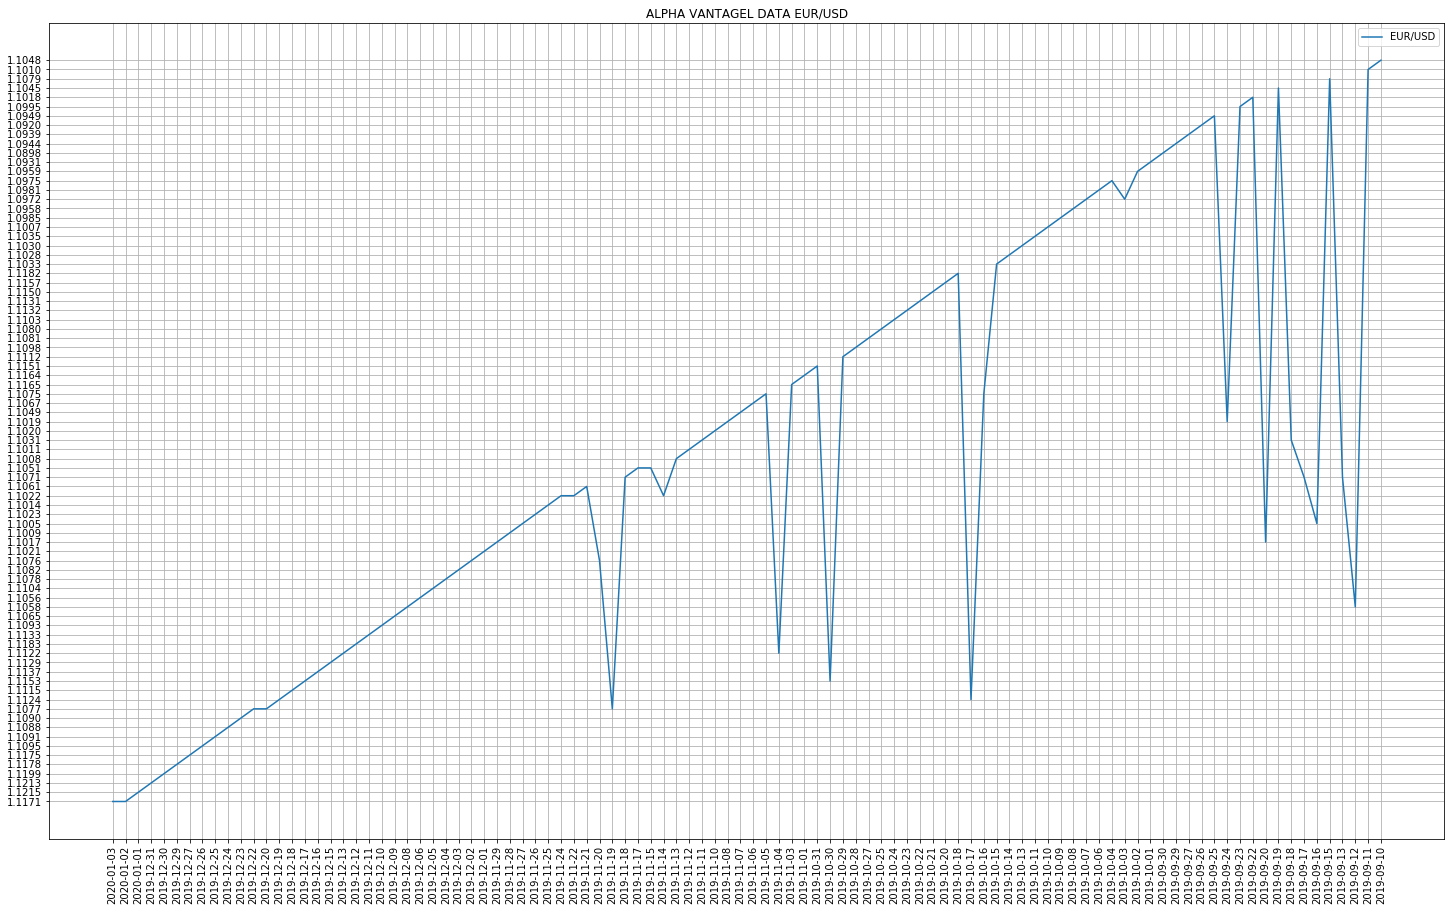

In [21]:
plt.figure(num=None, figsize=(25, 15))
plt.xticks(rotation='vertical')
plt.yticks(rotation='horizontal')
plt.plot(df1['Close'],label='EUR/USD')
plt.grid()
plt.legend( ['EUR/USD'])
plt.title('ALPHA VANTAGEL DATA EUR/USD')
plt.show()